# 차원 축소


일반적으로 차원이 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고, 희소(sparse)한 구조를 가지게 된다.
따라서, 수백 개 이상의 피처로 구성된 세트의 경우 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어진다.
또한, 피처가 많을 경우 개별 피처간에 상관관계가 높을 가능성이 크다.

---

일반적으로 차원축소는 피처선택(Feature selection) 과 피처추출(Feature extraction)로 나눌 수 있다.

#### 피처 선택
- 특정 피처에 종속성이 강한 불필요한 피처는 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것

#### 피처 추출
- 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것 (기존의 피처와 완전히 다른 값)
- 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것

## PCA (Principal Component Analysis)

여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분 (Principal Component)을 추출해 차원을 축소하는 기법이다.

기존 데이터의 유실을 줄이기 위해, 가장 높은 분산을 가지는 데이터의 축을 찾아 해당 축으로 차원을 축소한다.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris=load_iris()

iris_df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Species']=iris.target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


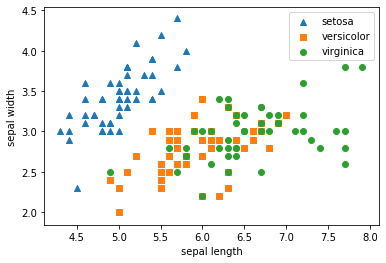

In [4]:
# setosa 는 세모, versicolor는 네모, virginica는 동그라미

markers=['^', 's', 'o']

for i,marker in enumerate(markers):
    x_axis_data=iris_df[iris_df['Species']==i]['sepal length (cm)']
    y_axis_data=iris_df[iris_df['Species']==i]['sepal width (cm)']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

setosa 품종은 sepal width가 3 이상, sepal length가 6 이하인 곳에 일정하게 분포되어 있다.

versicolor와 virginica는 두개의 피쳐로는 구분이 불분명하다.

In [30]:
# PCA는 여러 속성을 계산해야 하기에 스케일링에 영향을 받는다

from sklearn.preprocessing import StandardScaler  

iris_scaled=StandardScaler().fit_transform(iris_df.drop('Species',axis=1))

In [31]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

pca.fit(iris_scaled)

iris_pca=pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [32]:
iris_pca=pd.DataFrame(iris_pca)
iris_pca.head()

,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [33]:
iris_pca['target']=iris.target

iris_pca.head()

,0,1,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [34]:
iris_pca.columns=['pca_component_1','pca_component_2','target']

In [35]:
iris_pca.columns

Index(['pca_component_1', 'pca_component_2', 'target'], dtype='object')

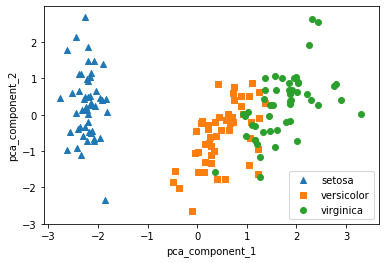

In [36]:
markers=['^', 's', 'o']

for i,marker in enumerate(markers):
    x_axis_data=iris_pca[iris_pca['target']==i]['pca_component_1']
    y_axis_data=iris_pca[iris_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율 확인

In [37]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


원본 붓꽃 데이터와 PCA로 변환된 세트의 분류 결과 비교

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf=RandomForestClassifier(random_state=156)
scores=cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print(scores)

[0.98 0.94 0.96]


In [39]:
pca_X=iris_pca[['pca_component_1','pca_component_2']]
scores_pca=cross_val_score(rcf, pca_X, iris_pca['target'], scoring='accuracy', cv=3)
print(scores_pca)

[0.88 0.88 0.88]


## LDA (Linear Discriminant Analysis)

선형 판별 분석법으로 불리며, PCA와 매우 유사하다.
 
LDA는 PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이지만, 중요한 차이는 LDA는
지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소한다.

PCA는 입력 데이터의 변동성의 가장 큰 축을 찾았지만, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는다.

---

LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산과 클래스 내부 분산의 비율을 최대화 하는 방식으로 차원을 축소한다.

즉, 클래스간 분산은 최대화하고, 클래스 내부의 분산은 최소화 시키는 방식이다.

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris=load_iris()

In [41]:
iris_scaled=StandardScaler().fit_transform(iris.data)

PCA와 달리, 지도학습이기에 클래스의 결정값이 필요하다.

In [42]:
lda=LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda=lda.transform(iris_scaled)

print(iris_lda.shape)

(150, 2)


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
iris_lda=pd.DataFrame(data=iris_lda, columns=lda_columns)
iris_lda['target']=iris.target

iris_lda.head()

,lda_component_1,lda_component_2,target
0,-8.061800,0.300421,0
1,-7.128688,-0.786660,0
2,-7.489828,-0.265384,0
3,-6.813201,-0.670631,0
4,-8.132309,0.514463,0


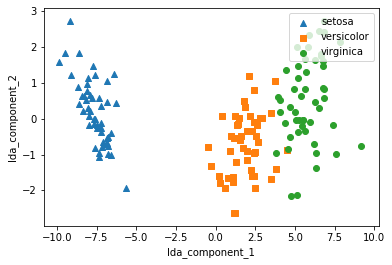

In [44]:
markers=['^', 's', 'o']

for i,marker in enumerate(markers):
    x_axis_data=iris_lda[iris_lda['target']==i]['lda_component_1']
    y_axis_data=iris_lda[iris_lda['target']==i]['lda_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

## SVD (Singular Value Decomposition)

PCA와 유사한 행렬 분해 기법을 이용한다. 특이값 분해라 불린다.

In [2]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()

C:\Users\river\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
iris_ftrs=iris.data

tsvd=TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)

iris_tsvd=tsvd.transform(iris_ftrs)

Text(0, 0.5, 'TruncatedSVD Component2')

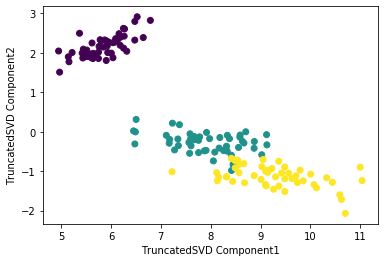

In [4]:
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Component1')
plt.ylabel('TruncatedSVD Component2')

In [6]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
iris_scaled=scaler.fit_transform(iris_ftrs)

tsvd=TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd=tsvd.transform(iris_scaled)

In [7]:
pca=PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)

Text(0.5, 1.0, 'PCA Transformed')

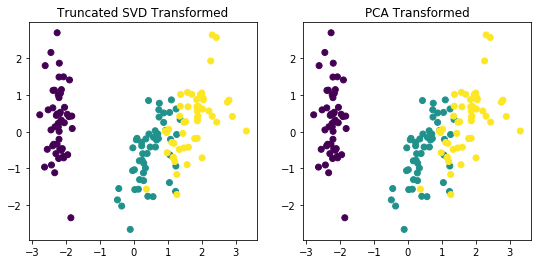

In [8]:
fig, (ax1, ax2)=plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [9]:
print((iris_pca-iris_tsvd).mean())
print((pca.components_-tsvd.components_).mean())

2.339771894751171e-15
-3.946495907847236e-17


데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행한다.

이는 PCA가 SVD 알고리즘으로 구현됐음을 의미한다.

차이점이 있다면, PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능하다면, SVD는 희소 행렬(Sparse Matrix)에 대한 변환도 가능하다.

## NMF (Non-Negative Matrix Factorization)

SVD와 유사하게 차원 축소를 통한 잠재 요소 도출로 이미지 변환 및 압축, 텍스트의 토픽 도출 등의 영역에서 사용되고 있다.

In [10]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()

In [11]:
iris_ftrs=iris.data

nmf=NMF(n_components=2)
nmf.fit(iris_ftrs)

iris_nmf=nmf.transform(iris_ftrs)

C:\Users\river\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
C:\Users\river\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Text(0, 0.5, 'NMF Component 2')

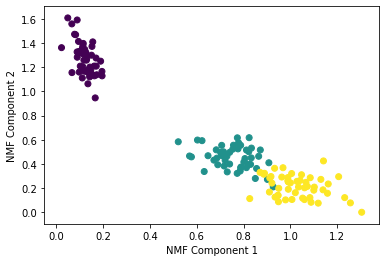

In [12]:
plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')